<center>
<table>
  <tr>
    <td><img src="http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg" width="100"/> </td>
     <td><img src="https://github.com/astg606/py_materials/blob/master/logos/ASTG_logo.png?raw=true" width="80"/> </td>
     <td> <img src="https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png" width="130"/> </td>
    </tr>
</table>
</center>

        
<center>
<h1><font color= "blue" size="+3">ASTG Python Courses</font></h1>
</center>

---

<center><h1>
    <font color="red">Creating Geometry Objects with Shapely</font>  
</h1></center>


# <font color="red"> Reference Documents</font>

- [Shapely Python Tutorial](https://coderslegacy.com/python/shapely-tutorial/)
- [Geometries (`shapely`)](https://geobgu.xyz/py/shapely.html)
- [Well-known text representation of geometry](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)
- [GeoJSON](https://geobgu.xyz/web-mapping2/geojson-1.html)

_______

---

# <font color="red">Required Packages</font>

We will mainly need:

- `matplotlib`: for plotting.
- `NumPy`: for converting Shapely objects into Numpy arrays.
- `Shapely`: for creating geometry objects.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
import numpy as np

In [4]:
import shapely
from shapely import geometry as shpgeom
from shapely import wkt as shpwkt
import shapely.plotting as shpplt # only goog for v2.0 or newer

In [5]:
print(f"Shapely version: {shapely.__version__}")
print(f"Numpy   version: {np.__version__}")

Shapely version: 2.0.1
Numpy   version: 1.23.2


# <font color="red">Objective</font>

### Spatial Data

- Geospatial includes information related to locations on the Earth’s surface (identified by latitude and longitude coordinates). 
- Geospatial data involves large sets of spatial data gathered from many diverse sources in varying formats and can include information such as census data, satellite imagery, weather data, cell phone data, drawn images and social media data. 
- Spatial data can be divided into two categories:

  - `Vector layers`: points, lines, and polygons, associated with attributes (such as properties, cities, roads, mountains and bodies of water).
  - `Rasters`: numeric arrays (for photographs and satellite images for instance) representing a regular grid over a rectangular area. Each piece of the grid can be either a continuous value (such as an elevation value) or a categorical classification (such as land cover classifications). Classic examples include altitude data or satellite images.
- Both vector and raster data usually come together with non-spatial data, also known as **attributes**. 
- Spatial data can have any number of additional attributes accompanying information about the location. For example, the location of a school can be associated with the name of the school, the number of students, or the address.

![fig_categories](https://gsp.humboldt.edu/olm/Lessons/GIS/08%20Rasters/Images/convertingdatamodels2.png)
Image Source: [Humboldt University](https://gsp.humboldt.edu/olm/Lessons/GIS/08%20Rasters/RasterToVector.html)


Examples of spatial data include:

- Vectors and attributes: Descriptive information about a location such as points, lines and polygons
- Model outputs: data such as temparture, winds, air pressure, etc. generated from numerical models.
- Observations: measurements obtained from satellites, ground-based stations, etc.
- Raster and satellite imagery: High-resolution images of our world, taken from above
- Census data: Released census data tied to specific geographic areas, for the study of community trends

### Objective
Our goal in this presentation is to work with the `vector layers` category. In particular, we want to cover the following topics:

- Call methods for creating geometry objects
- Extract geometry properties:
   - Geometry type
   - Coordinates
   - Derived properties, such as length and area
- Plot the geometry objects using Shapely and Matplotlib.



# <font color="red">What is Shapely?</font>

* Used for the manipulation and analysis of planar geometric objects such as:
   * Points
   * Lines
   * Polygons
   * Meshes
   * etc.
* Includes functions for creating geometries, as well as functions for applying geometric operations on geometries, such as calculating the centroid of a polygon.
* Only deals with individual geometries, their creation, their derived properties, and spatial operation applied to them.
* Does not include any functions to read or write geometries to or from files, or more complex data structures to represent collections of geometries with or without non-spatial attributes (done in GeosPandas). 
* Finds application in any geometry/geography related work.
* Relies on [GEOS](https://trac.osgeo.org/geos) and JTS libraries.
* Uses the conventions of the geographic information systems (GIS) world.
* Used is packages such as Cartopy, GeoPandas.

In Shapely, there are 7 main geometry types:


| __Type__ | __Description__ |
| :----- | :----- |
| "Point"	| A single point  | 
| "LineString"	| Sequence of connected points forming a line | 
| "Polygon"	| Sequence of connected points “closed” to form a polygon, possibly having one or more holes | 
| "MultiPoint"	| Set of points | 
| "MultiLineString"	| Set of lines | 
| "MultiPolygon"	| Set of polygons | 
| "GeometryCollection"	| Set of geometries of any type except for "GeometryCollection" | 

![fig_geotypes](https://geobgu.xyz/py/_images/simple_feature_types.svg)
Image Source: [https://geobgu.xyz/](https://geobgu.xyz/)

## <font color="blue">Well-known text (WKT) format</font>

- A text markup language or representing vector geometry objects on a map and spatial reference systems of spatial objects.
- WKT can be used both to construct new instances of the type and to convert existing instances to textual form for alphanumeric display.
- WTK can represent points, lines, polygons, multi-geometries, etc.
- Each geometry object in WKT has a tag which says what it is, usually followed by a list of coordinates. For example, here are some common tags:
   - `POINT(...)`
   - `LINESTRING(...)`
   - `POLYGON((...))`
   - `MULTIPOLYGON(...)`



## <font color="blue">GeoJSON</font>

- Plain-text format designed for representing vector geometries, with or without non-spatial attributes.
- Based on the JavaScript Object Notation, JSON.
- Its format is simple and human-reade
- Most common data format for exchanging spatial (vector) data on the web.
- **Supports the seven most commonly used geometry types (as shown above).** 


The following GeoJSON string represents a point layer with one attribute called `name` and with one feature, a point at coordinates `[125.6, 10.1]`:

```json
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```

- A `"Feature"` is formed when a geometry is combined with non-spatial attributes, to form a single object. 
- The non-spatial attributes are encompassed in a property named `"properties"`, containing one or more name-value pairs—one for each attribute. 

---

**In this presentation, we show three different ways of creating geometry objects with Shapely:**
- Pure shapely formulation
- WTK formulation
- GeoJSON formulation

***

# <font color="red">Creating Shapely Objects</font>

The package `shapely.geometry` contains all geometry-related functions for manipulating geometry objects.

| Geometry Type | Function to Create | Access Coordinates |
| :--- | :---  | :--- |
| `Point` | `shapely.geometry.Point` | `.coords` |
| `MultiPoint` |  `shapely.geometry.MultiPoint` | `.geoms[i].coords` |
| `LineString` |  `shapely.geometry.LineString` | `.coords`  |
| `MultiLineString` |  `shapely.geometry.MultiLineString` | `.geoms[i].coords` |
| `Polygon` |  `shapely.geometry.Polygon` | `.exterior.coords` |
|           |                             | `.interiors[i].coords` |
| `MultiPolygon` | `shapely.geometry.MultiPolygon` | `.geoms[i].exterior.coords` |
|           |              | `.geoms[i].interiors[j].coords` |
| `GeometryCollection` |  `shapely.geometry.GeometryCollection` |  |

Coordinate sequences of an object are associated with the concepts of exterior and interiors coordinate sequences:

- The __exterior__ is the outer bound of the object. There is only one exterior sequence per object. The `.exterior` property gives direct access to the exterior geometry.
- The __interiors__ refers to the object holes. There can be zero or more holes in each object. Accordingly, the `.interiors` property is a sequence of length zero or more.

## <font color="blue"> Point Object</font>

- This is the most basic “shape” which represents a single coordinate.

#### Creating a point

In [6]:
pt1 = shpgeom.Point(5, 7)

You can view all the geometric objects without having to resort to any graphical package:

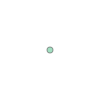

In [7]:
pt1

In [8]:
print(pt1)

POINT (5 7)


You can obtain the geometry type:

In [9]:
pt1.geom_type

'Point'

We can display the string representation of the object:

In [10]:
str(pt1)

'POINT (5 7)'

#### Using the Well Known Text (WKT) string formulation

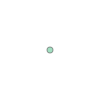

In [11]:
pt2 = shpwkt.loads('POINT (1 4)')
pt2

In [12]:
print(pt2)

POINT (1 4)


In [13]:
shpwkt.dumps(pt2)

'POINT (1.0000000000000000 4.0000000000000000)'

We can load the string representation back into geometric format:

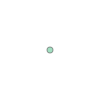

In [14]:
shpwkt.loads(str(pt1))

#### Using the GeosJSON formulation
- We use the `shapely.geometry.shape` function.
- The function accepts GeoJSON-like dictionary with the geometry definition.
- The dictionary needs to have a least two properties:
   - `"type"`: contains the geometry type.
   - `"coordinates"`: contains the sequences of geometries/parts/coordinates, as lists or tuples.

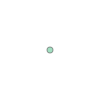

In [15]:
d = {'type': 'Point', 'coordinates': (-5, 2)}
pt3 = shpgeom.shape(d)
pt3

You can conver a Shapely geometry object into the GeoJSON representation using the `to_geojson()` function:

In [16]:
shapely.to_geojson(pt3)

'{"type":"Point","coordinates":[-5.0,2.0]}'

In [17]:
print(shapely.to_geojson(pt3, indent=2))

{
  "type": "Point",
  "coordinates": [
    -5.0,
    2.0
  ]
}


#### `Point` attributes and functions

Extract the coordinates:

In [19]:
print(pt1.x)
print(pt1.y)  

5.0
7.0


In [20]:
list(pt1.coords) # Tuple of x-y coordinates

[(5.0, 7.0)]

In [21]:
pt1.xy   #

(array('d', [5.0]), array('d', [7.0]))

Convert a `Point` object into an array of point coordinates:

In [22]:
np.array(pt1)

array(<POINT (5 7)>, dtype=object)

Compute the area and the length:

In [18]:
print(pt1.area)
print(pt1.length)

0.0
0.0


Compute the distance between the two points:

In [23]:
pt1.distance(pt2)

5.0

#### Plot using Matplotlib

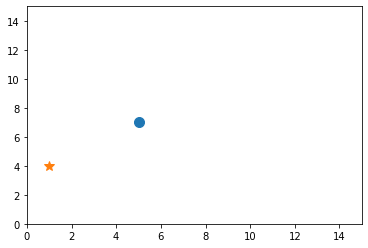

In [24]:
fig, ax = plt.subplots()
pts = list(pt1.coords)
x1,y1 = zip(*pts)

pts = list(pt2.coords)
x2,y2 = zip(*pts)

ax.plot(x1, y1,  marker="o", markersize=10)
ax.plot(x2, y2,  marker="*", markersize=10)

ax.set_xlim([0,15])
ax.set_ylim([0,15]);

### <font color="green">Breakout</font>

Determine if the points `(5,5)`, `(2,7)` and (`7,8)` form a right triangle.


<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
pt1 = shpgeom.Point(5,5)
pt2 = shpgeom.Point(2,7)
pt3 = shpgeom.Point(7,8)

A = pt2.distance(pt1)
B = pt1.distance(pt3)
C = pt3.distance(pt2)

assert A**2 + B**2 == C**2
```
</details>

## <font color="blue"> MultiPoint Object</font>

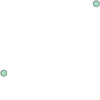

In [25]:
points = shpgeom.MultiPoint([(5, 7), (1, 4)])
points

#### Using the GeosJSON formulation

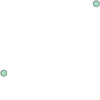

In [26]:
d = {
    'type': 'MultiPoint', 
    'coordinates': [
        (5, 7),
        (1, 4)
    ]
}
points2 = shpgeom.shape(d)
points2

#### Turn the points `pt1` and `pt2` into a MultiPoint object

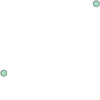

In [27]:
points = shpgeom.MultiPoint([pt1, pt2])
points

Get the GeoJSON representation:

In [28]:
print(shapely.to_geojson(points, indent=2))

{
  "type": "MultiPoint",
  "coordinates": [
    [
      5.0,
      7.0
    ],
    [
      1.0,
      4.0
    ]
  ]
}


#### `MultiPoint` attributes and functions

Find the centroid:

In [29]:
np.array(points.centroid)

array(<POINT (3 5.5)>, dtype=object)

Get the list points in the object:

In [30]:
len(points.geoms)

2

In [31]:
list(points.geoms)

[<POINT (5 7)>, <POINT (1 4)>]

In [32]:
list(points.geoms[0].coords)

[(5.0, 7.0)]

In [33]:
list(points.geoms[1].coords)

[(1.0, 4.0)]

#### Plot

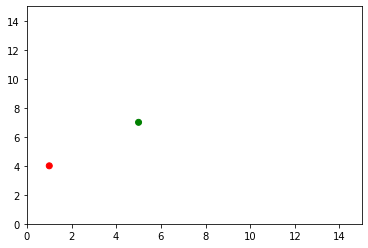

In [34]:
fig, ax = plt.subplots()
pts = list()
for i in range(len(points.geoms)):
    pts.append(points.geoms[i].coords[0])

x,y = zip(*pts)

ax.scatter(x, y, c=["green", "red"])

ax.set_xlim([0,15])
ax.set_ylim([0,15]);

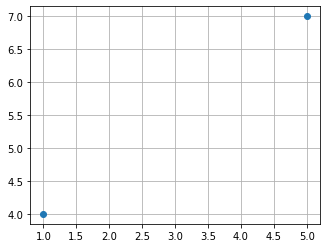

In [35]:
shpplt.plot_points(points)

### <font color="green"> Breakout </font>

Consider:

```python
POINTS = [
    (0, 4275),
    (1225, 5500),
    (3500, 5500),
    (4220, 4970),
    (4220, 2025),
    (3000, 732),
    (1140, 732),
    (0, 1500)
]

my_polygon = shpgeom.MultiPoint(POINTS).convex_hull
```
Write a function that takes an argument `x` and `y` and determine if the point `(x, y)` is within `my_polygon`. We assume that `x` is a random integer between `1` and `4367`, and `y` is a random integer between `730` and `5720`.

**Hint:** Consider the function `Point.within()`.

<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
POINTS = [
    (0, 4275),
    (1225, 5500),
    (3500, 5500),
    (4220, 4970),
    (4220, 2025),
    (3000, 732),
    (1140, 732),
    (0, 1500)
]

my_polygon = shpgeom.MultiPoint(POINTS).convex_hull
shpplt.plot_polygon(my_polygon);

def check_point(x, y):
    my_point = shpgeom.Point(x,y)
    return my_point.within(my_polygon)

import random

x = random.randint(1, 4367)
y = random.randint(730, 5720)
in_polygon = check_point(x, y)
print(f"The point ({x},{y}) is in the polygon? {in_polygon}")
```
</details>

## <font color="blue"> LineString Object</font>

- Created using a list of tuples (represnting points).
- They can cross themselves.
- The order of points is important as it determines the order in which you pass through them.

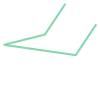

In [40]:
line1 = shpgeom.LineString([(5, 7), (3,4), (-1, 3), (6,2), (8, 5)])
line1

#### Using the WKT formulation

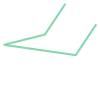

In [41]:
line2 = shpwkt.loads('LINESTRING (5 7, 3 4, -1 3, 6 2, 8 5)')
line2

#### Using the GeosJSON formulation

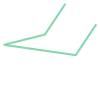

In [42]:
d = {
    'type': 'LineString', 
    'coordinates': [
        (5, 7), (3,4), (-1, 3), (6,2), (8, 5)
    ]
}
line3 = shpgeom.shape(d)
line3

#### `LineString` attributes and functions

Extract the coordinates

In [43]:
line1.xy

(array('d', [5.0, 3.0, -1.0, 6.0, 8.0]), array('d', [7.0, 4.0, 3.0, 2.0, 5.0]))

In [44]:
list(line1.xy[0])

[5.0, 3.0, -1.0, 6.0, 8.0]

In [45]:
list(line1.xy[-1])

[7.0, 4.0, 3.0, 2.0, 5.0]

In [46]:
list(line2.coords)

[(5.0, 7.0), (3.0, 4.0), (-1.0, 3.0), (6.0, 2.0), (8.0, 5.0)]

Convert a `LineString` object into an array of point coordinates:

In [47]:
np.array(line1)

array(<LINESTRING (5 7, 3 4, -1 3, 6 2, 8 5)>, dtype=object)

Compute the length of the line:

In [48]:
line1.length

18.405275988411113

Get the centroid:

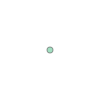

In [113]:
line1.centroid

In [114]:
print(line1.centroid)

POINT (3.3393598240028943 3.5076084020229135)


#### Plot using Matplotlib

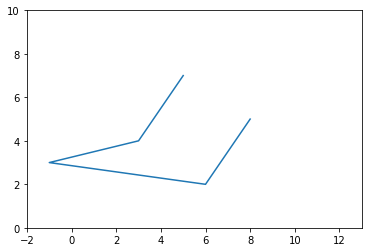

In [49]:
fig, ax = plt.subplots()
pts = list(line1.coords)
x,y = zip(*pts)
ax.plot(x, y)
ax.set_xlim([-2,13])
ax.set_ylim([0,10]);

(<matplotlib.patches.PathPatch at 0x7f804e8adf40>,
 <matplotlib.lines.Line2D at 0x7f804e8c0220>)

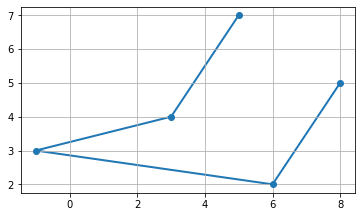

In [50]:
shpplt.plot_line(line1)

Compute the distance between a point and the line:

In [51]:
pt2.distance(line2)

0.48507125007266594

Determine the point projection on the line:

In [52]:
line2.project(pt2)

5.545836275754652

## <font color="blue"> MultiLineString Object</font>

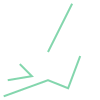

In [53]:
coords = [((0, 0), (6, 1), (3, 4)), 
          ((-1, -4), (10, 0), (15, -2), (18, 6)),
          ((10, 7), (16, 19))
         ]
lines = shpgeom.MultiLineString(coords)
lines

#### Using the GeosJSON formulation

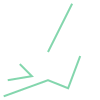

In [54]:
d = {
    'type': 'MultiLineString', 
    'coordinates': coords
}
lines2 = shpgeom.shape(d)
lines2

In [55]:
lines.length

49.3756795455879

In [56]:
len(lines.geoms)

3

In [57]:
lines.bounds

(-1.0, -4.0, 18.0, 19.0)

In [58]:
list(lines.geoms)

[<LINESTRING (0 0, 6 1, 3 4)>,
 <LINESTRING (-1 -4, 10 0, 15 -2, 18 6)>,
 <LINESTRING (10 7, 16 19)>]

(<matplotlib.patches.PathPatch at 0x7f804e9b78b0>,
 <matplotlib.lines.Line2D at 0x7f804e9b7ca0>)

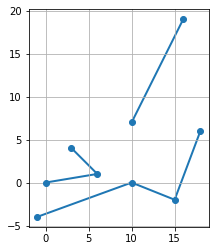

In [59]:
shpplt.plot_line(lines)

## <font color="blue"> Polygon Object</font>

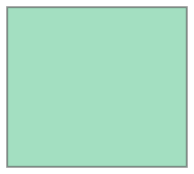

In [60]:
coords = [(20, 20), (200, 20), (200, 180), (20, 180)]
poly1 = shpgeom.Polygon(coords)
poly1

#### Use the WKT formulation

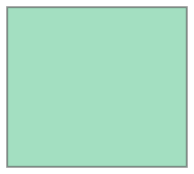

In [61]:
poly2 = shpwkt.loads('POLYGON ((20 20, 200 20, 200 180, 20 180, 20 20))')
poly2

#### Use the GeoJSON formulation

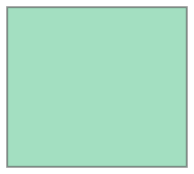

In [62]:
coords2 = [
    [(20, 20), (200, 20), (200, 180), (20, 180)]
]
d = {
  'type': 'Polygon',
  'coordinates': coords2
}
shapely.geometry.shape(d)

In [63]:
shpgeom.mapping(poly1)

{'type': 'Polygon',
 'coordinates': (((20.0, 20.0),
   (200.0, 20.0),
   (200.0, 180.0),
   (20.0, 180.0),
   (20.0, 20.0)),)}

#### Extract the coordinates

In [64]:
poly1.exterior.xy

(array('d', [20.0, 200.0, 200.0, 20.0, 20.0]),
 array('d', [20.0, 20.0, 180.0, 180.0, 20.0]))

In [65]:
list(poly1.exterior.coords)

[(20.0, 20.0), (200.0, 20.0), (200.0, 180.0), (20.0, 180.0), (20.0, 20.0)]

In [66]:
np.array(poly1.exterior)

array(<LINEARRING (20 20, 200 20, 200 180, 20 180, 20 20)>, dtype=object)

#### x-y bounding box is a (`minx`, `miny`, `maxx`, `maxy`) tuple.

In [67]:
poly1.bounds

(20.0, 20.0, 200.0, 180.0)

#### Compute the area

In [68]:
poly1.area

28800.0

#### Compute the centroid

In [69]:
np.array(poly1.centroid)

array(<POINT (110 100)>, dtype=object)

#### Check if a point is within a polygon

In [70]:
pt1.within(poly1)

False

In [71]:
poly1.centroid.within(poly1)

True

#### Use the Shapely plotting tool

(<matplotlib.patches.PathPatch at 0x7f804eb79cd0>,
 <matplotlib.lines.Line2D at 0x7f804eb97160>)

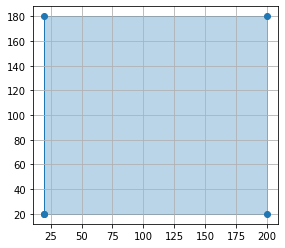

In [72]:
shpplt.plot_polygon(poly1)

In [73]:
def add_polygon_patch(coords, ax, fc='blue'):
    patch = patches.Polygon(np.array(coords.xy).T, fc=fc)
    ax.add_patch(patch)

def plot_poly(poly):
    fig, ax = plt.subplots(1, 1)

    add_polygon_patch(poly.exterior, ax)
    for interior in poly.interiors:
        add_polygon_patch(interior, ax, 'white')
        
    ax.axis('equal')

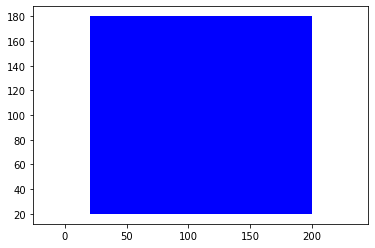

In [74]:
plot_poly(poly1)

#### Polygon with holes

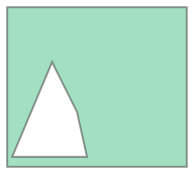

In [75]:
poly3 = shpgeom.Polygon(
    [(20, 20), (200, 20), (200, 180), (20, 180)],
    [[(25, 30), (100, 30), (90, 75), (65, 125)]]
)
poly3

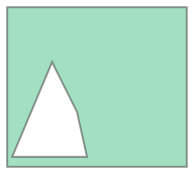

In [76]:
shpwkt.loads('POLYGON ((20 20, 200 20, 200 180, 20 180, 20 20), (25 30, 100 30, 90 75, 65 125, 25 30))')

#### Use the GeoJSON to formulation

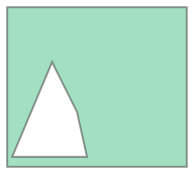

In [77]:
coords2 = [
    [[20.0,20.0],[200.0,20.0],[200.0,180.0],[20.0,180.0],[20.0,20.0]],
    [[25.0,30.0],[100.0,30.0],[90.0,75.0],[65.0,125.0],[25.0,30.0]]
]
d = {
  'type': 'Polygon',
  'coordinates': coords2
}
shapely.geometry.shape(d)

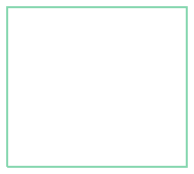

In [78]:
poly3.exterior

In [79]:
list(poly3.exterior.coords)

[(20.0, 20.0), (200.0, 20.0), (200.0, 180.0), (20.0, 180.0), (20.0, 20.0)]

In [80]:
len(poly3.interiors)

1

In [81]:
list(poly3.interiors[0].coords)

[(25.0, 30.0), (100.0, 30.0), (90.0, 75.0), (65.0, 125.0), (25.0, 30.0)]

Plotting:

(<matplotlib.patches.PathPatch at 0x7f804d1a7ee0>,
 <matplotlib.lines.Line2D at 0x7f804d1a7cd0>)

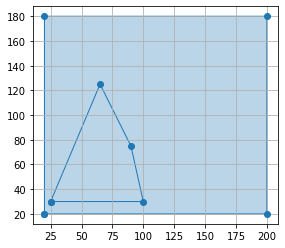

In [82]:
shpplt.plot_polygon(poly3)

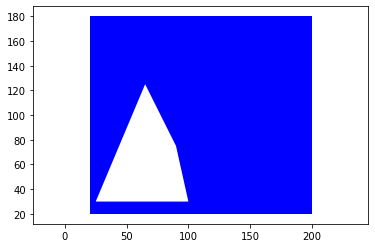

In [83]:
plot_poly(poly3)

#### Convert LineString and point objects into Polygons

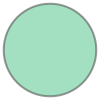

In [84]:
poly5 = shpgeom.Point(5, 7).buffer(3)
poly5

This is still a polygon (not a circle in a strict sense), comprised, in this case, of `65` points:

In [85]:
len(np.array(poly5.exterior.coords))

65

You can increase the precision from the default resolution (16), by passing resolution parameter in your buffer:

In [86]:
poly6 = shpgeom.Point(5, 7).buffer(3, resolution=32)
len(np.array(poly6.exterior.coords))

129

In [87]:
np.array(poly5.centroid)

array(<POINT (5 7)>, dtype=object)

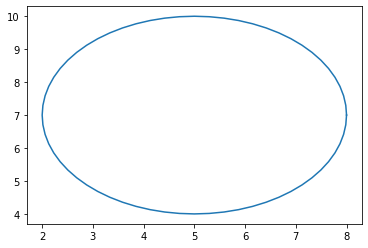

In [88]:
fig, ax = plt.subplots()
pts = list(poly5.exterior.coords)
x,y = zip(*pts)
ax.plot(x, y);

Buffer allows you to easily relate polygons and other geometry objects. For example, if you want to cut a polygon by a line of a specific width:

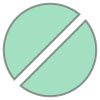

In [89]:
shpgeom.Point(10,10).buffer(10).difference(
    shpgeom.LineString([
        (0, 0),
        (20, 20)
    ]
    ).buffer(0.95))

You may cut it without any loss of surface area:

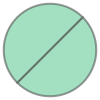

In [90]:
from shapely.ops import split
shapely.ops.split(
    shpgeom.Point(10,10).buffer(10),
    shpgeom.LineString([
        (0, 0),
        (20, 20)
    ])
)

In [91]:
object = shpgeom.box(2, 2, 5, 10)
print(object.bounds)
print(list(object.exterior.coords))

(2.0, 2.0, 5.0, 10.0)
[(5.0, 2.0), (5.0, 10.0), (2.0, 10.0), (2.0, 2.0), (5.0, 2.0)]


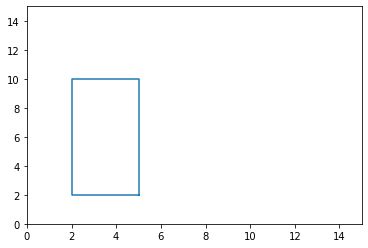

In [92]:
fig, ax = plt.subplots()
pts = list(object.exterior.coords)
x,y = zip(*pts)
ax.plot(x, y)
ax.set_xlim([0,15])
ax.set_ylim([0,15]);

In [93]:
object = shpgeom.Polygon([(20, 20), (200, 20), (200, 180), (20, 180)])
print(object.type)
print(list(object.exterior.coords))

Polygon
[(20.0, 20.0), (200.0, 20.0), (200.0, 180.0), (20.0, 180.0), (20.0, 20.0)]


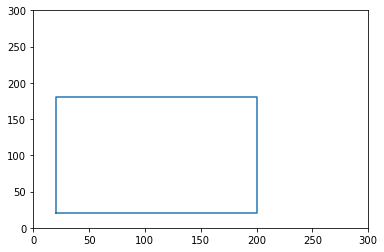

In [94]:
fig, ax = plt.subplots()
pts = list(object.exterior.coords)
x,y = zip(*pts)
ax.plot(x, y)
ax.set_xlim([0,300])
ax.set_ylim([0,300]);

## <font color="blue">MultiPolygon Object</font>

#### Create individuals polygons

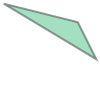

In [95]:
pl1 = shpgeom.Polygon(((40, 40), (20, 45), (45, 30)))
pl1

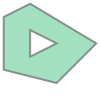

In [96]:
pl2 = shpgeom.Polygon(
    ((20, 35), (10, 30), (10, 10), (30, 5), (45, 20)), 
    [[(30, 20), (20, 15), (20, 25)]]    
)
pl2

#### Combine the multiple polygons

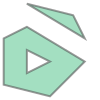

In [97]:
mpoly = shpgeom.MultiPolygon([pl1, pl2])
mpoly

#### Use the WKT formulation

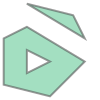

In [98]:
shpwkt.loads('''
MULTIPOLYGON
(((40 40, 20 45, 45 30, 40 40)),
((20 35, 10 30, 10 10, 30 5, 45 20, 20 35), (30 20, 20 15, 20 25, 30 20)))
''')

#### Use the GeosJSON formulation

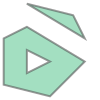

In [99]:
d = {
  'type': 'MultiPolygon',
  'coordinates': [
    [
      [[40, 40], [20, 45], [45, 30], [40, 40]]
    ],
    [
      [[20, 35], [10, 30], [10, 10], [30, 5], [45, 20], 
      [20, 35]], 
      [[30, 20], [20, 15], [20, 25], [30, 20]]
    ]
  ]
}
shapely.geometry.shape(d)

In [100]:
mpoly.bounds

(10.0, 5.0, 45.0, 45.0)

In [101]:
len(mpoly.geoms)

2

In [102]:
mpoly.area

712.5

In [103]:
np.array(mpoly.centroid)

array(<POINT (25.585 21.667)>, dtype=object)

### Example

We divide our world into western and eastern hemispheres with a hole on the western hemisphere.

Create the exterior of the western part of the world:

In [115]:
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

Create a hole:

In [117]:
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

Create a polygon:

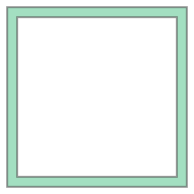

In [119]:
west_poly = shpgeom.Polygon(shell=west_exterior, holes=west_hole)
west_poly

Create he Polygon of our Eastern hemisphere polygon using bounding box.
For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates:

In [120]:
max_x, max_y = 180, 90
min_x, min_y = 0, -90

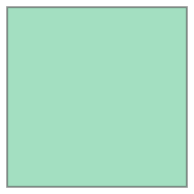

In [121]:
east_poly_box = shpgeom.box(minx=min_x, miny=min_y, 
                            maxx=max_x, maxy=max_y)
east_poly_box

Create the MultiPolygon. We can pass multiple Polygon objects.

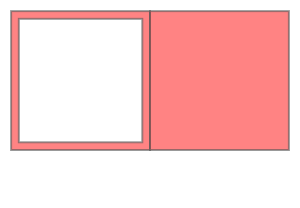

In [122]:
multi_poly = shpgeom.MultiPolygon([west_poly, east_poly_box])
multi_poly

In [123]:
multi_poly.area

39200.0

In [128]:
# West area
multi_poly.geoms[0].area

6800.0

In [129]:
# East area
multi_poly.geoms[1].area

32400.0

In [132]:
area = 0.0
for polygon in multi_poly.geoms:
    area += polygon.area

print(area)

39200.0


### <font color="green">GeometryCollection Object</font>

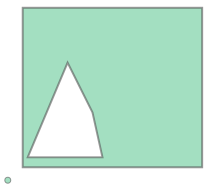

In [104]:
geocol = shpgeom.GeometryCollection([pt1, poly3])
geocol

In [105]:
print(shapely.to_geojson(geocol, indent=1))

{
 "type": "GeometryCollection",
 "geometries": [
  {
   "type": "Point",
   "coordinates": [
    5.0,
    7.0
   ]
  },
  {
   "type": "Polygon",
   "coordinates": [
    [
     [
      20.0,
      20.0
     ],
     [
      200.0,
      20.0
     ],
     [
      200.0,
      180.0
     ],
     [
      20.0,
      180.0
     ],
     [
      20.0,
      20.0
     ]
    ],
    [
     [
      25.0,
      30.0
     ],
     [
      100.0,
      30.0
     ],
     [
      90.0,
      75.0
     ],
     [
      65.0,
      125.0
     ],
     [
      25.0,
      30.0
     ]
    ]
   ]
  }
 ]
}


## <font color="green"> Breakout 5</font>
Draw the USA map and randomly color each state.

You may want to use:

```python
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shapereader.natural_earth(resolution='110m',
                                       category='cultural',
                                       name=shapename)

reader = shapereader.Reader(states_shp)
```

<details><summary><b><font color="green">Click here to access the solution</font></b></summary>
<p>

```python
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shapereader.natural_earth(resolution='110m',
                                       category='cultural',
                                       name=shapename)

reader = shapereader.Reader(states_shp)

subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(16, 15), subplot_kw=subplot_kw)
 
ax.set_extent([-130, -65, 24, 47])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
 
# Get from Matplotlib a list of colors
#------------------------------
colors = list(cnames.keys())
len_colors = len(colors)

k = 0
for record, state in zip(reader.records(), reader.geometries()):
    if k+1 == len_colors:
        k = 0
    else:
        k += 1
    facecolor = colors[k]
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
```

<p>
</details>